# EDA

In [1]:
import numpy as np
import pandas as pd
from sqlalchemy import create_engine
import warnings
warnings.filterwarnings('ignore')

## 1. COVID-19 Report

In [2]:
# Accessing data from database
engine = create_engine('sqlite:///covid.db')
df = pd.read_sql('SELECT * FROM case_data;',engine)

df['report_date'] = pd.to_datetime(df.report_date)

In [3]:
df.head()

,report_date,fips,locality,vdh_health_district,total_cases,hospitalizations,deaths
0,2021-06-18,51001,Accomack,Eastern Shore,2868,212,45
1,2021-06-18,51003,Albemarle,Blue Ridge,5815,235,85
2,2021-06-18,51005,Alleghany,Alleghany,1372,64,49
3,2021-06-18,51007,Amelia,Piedmont,926,54,36
4,2021-06-18,51009,Amherst,Central Virginia,2979,127,40


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61047 entries, 0 to 61046
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   report_date          61047 non-null  datetime64[ns]
 1   fips                 61047 non-null  object        
 2   locality             61047 non-null  object        
 3   vdh_health_district  61047 non-null  object        
 4   total_cases          61047 non-null  object        
 5   hospitalizations     61047 non-null  object        
 6   deaths               61047 non-null  object        
dtypes: datetime64[ns](1), object(6)
memory usage: 3.3+ MB


In [17]:
df['total_cases'] = df.total_cases.astype(int)
df['hospitalizations'] = df.hospitalizations.astype(int)
df['deaths'] = df.deaths.astype(int)

In [5]:
# group by district, county and date
(df
.groupby(['vdh_health_district','locality','report_date'])
.total_cases.sum()
.reset_index()
.sort_values('total_cases', ascending=False)).head()

,vdh_health_district,locality,report_date,total_cases
48563,Richmond,Richmond City,2021-01-07,9999
45885,Rappahannock,Stafford,2021-03-24,9998
3512,Arlington,Arlington,2021-01-10,9997
23418,Hampton,Hampton,2021-04-17,9996
57166,Virginia Beach,Virginia Beach,2020-11-22,9992


In [6]:
df.sort_values(['vdh_health_district', 'locality','report_date'],
              inplace=True,ascending=True)
df.head(10)

,report_date,fips,locality,vdh_health_district,total_cases,hospitalizations,deaths
61009,2020-03-17,51510,Alexandria,Alexandria,2,0,0
60876,2020-03-18,51510,Alexandria,Alexandria,2,0,0
60743,2020-03-19,51510,Alexandria,Alexandria,4,0,0
60610,2020-03-20,51510,Alexandria,Alexandria,3,0,0
60477,2020-03-21,51510,Alexandria,Alexandria,5,0,0
60344,2020-03-22,51510,Alexandria,Alexandria,5,0,0
60211,2020-03-23,51510,Alexandria,Alexandria,6,0,0
60078,2020-03-24,51510,Alexandria,Alexandria,8,0,0
59945,2020-03-25,51510,Alexandria,Alexandria,9,0,0
59812,2020-03-26,51510,Alexandria,Alexandria,14,0,0


In [7]:
county_list = list(pd.unique(df.locality.values))
print(len(county_list))
print(county_list)

133
['Alexandria', 'Alleghany', 'Botetourt', 'Covington', 'Craig', 'Roanoke County', 'Salem', 'Arlington', 'Albemarle', 'Charlottesville', 'Fluvanna', 'Greene', 'Louisa', 'Nelson', 'Augusta', 'Bath', 'Buena Vista City', 'Harrisonburg', 'Highland', 'Lexington', 'Rockbridge', 'Rockingham', 'Staunton', 'Waynesboro', 'Amherst', 'Appomattox', 'Bedford', 'Campbell', 'Lynchburg', 'Chesapeake', 'Chesterfield', 'Colonial Heights', 'Powhatan', 'Charles City', 'Goochland', 'Hanover', 'New Kent', 'Dinwiddie', 'Emporia', 'Greensville', 'Hopewell', 'Petersburg', 'Prince George', 'Surry', 'Sussex', 'Buchanan', 'Dickenson', 'Russell', 'Tazewell', 'Accomack', 'Northampton', 'Fairfax', 'Fairfax City', 'Falls Church', 'Hampton', 'Henrico', 'Lee', 'Norton', 'Scott', 'Wise', 'Clarke', 'Frederick', 'Page', 'Shenandoah', 'Warren', 'Winchester', 'Loudoun', 'Bland', 'Bristol', 'Carroll', 'Galax', 'Grayson', 'Smyth', 'Washington', 'Wythe', 'Floyd', 'Giles', 'Montgomery', 'Pulaski', 'Radford', 'Norfolk', 'James 

In [8]:
district_list = list(pd.unique(df.vdh_health_district.values))
print(len(district_list))
print(district_list)

36
['Alexandria', 'Alleghany', 'Arlington', 'Blue Ridge', 'Central Shenandoah', 'Central Virginia', 'Chesapeake', 'Chesterfield', 'Chickahominy', 'Crater', 'Cumberland Plateau', 'Eastern Shore', 'Fairfax', 'Hampton', 'Henrico', 'Lenowisco', 'Lord Fairfax', 'Loudoun', 'Mount Rogers', 'New River', 'Norfolk', 'Peninsula', 'Piedmont', 'Pittsylvania-Danville', 'Portsmouth', 'Prince William', 'Rappahannock', 'Rappahannock Rapidan', 'Richmond', 'Roanoke', 'Southside', 'Thomas Jefferson', 'Three Rivers', 'Virginia Beach', 'West Piedmont', 'Western Tidewater']


In [9]:
# VDH rename Thomas Jefferson district to Blue Ridge
df.replace({'vdh_health_district':"Thomas Jefferson"}, "Blue Ridge", inplace=True)

In [10]:
district_list = list(pd.unique(df.vdh_health_district.values))
print(len(district_list))

35


In [18]:
# cumulative counts
cumulative_df = (df
.groupby(['report_date'])
['total_cases','hospitalizations','deaths'].sum()
.reset_index()
.sort_values('total_cases', ascending=False))

In [19]:
cumulative_df.head()

,report_date,total_cases,hospitalizations,deaths
458,2021-06-18,678506,30291,11342
457,2021-06-17,678392,30263,11336
456,2021-06-16,678226,30241,11330
455,2021-06-15,677949,30208,11328
454,2021-06-14,677812,30182,11318


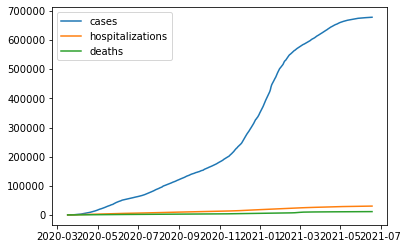

In [20]:
import matplotlib.pyplot as plt
plt.plot(cumulative_df.report_date,cumulative_df.total_cases, label='cases')
plt.plot(cumulative_df.report_date,cumulative_df.hospitalizations, label='hospitalizations')
plt.plot(cumulative_df.report_date,cumulative_df.deaths, label='deaths')
plt.legend();

In [21]:
print('total cases: ', cumulative_df.total_cases.max())
print('total hospitalizations: ', cumulative_df.hospitalizations.max())
print('total deaths: ', cumulative_df.deaths.max())

total cases:  678506
total hospitalizations:  30291
total deaths:  11342


In [23]:
print(pd.unique(df.fips.values))

['51510' '51005' '51023' '51580' '51045' '51161' '51775' '51013' '51003'
 '51540' '51065' '51079' '51109' '51125' '51015' '51017' '51530' '51660'
 '51091' '51678' '51163' '51165' '51790' '51820' '51009' '51011' '51019'
 '51031' '51680' '51550' '51041' '51570' '51145' '51036' '51075' '51085'
 '51127' '51053' '51595' '51081' '51670' '51730' '51149' '51181' '51183'
 '51027' '51051' '51167' '51185' '51001' '51131' '51059' '51600' '51610'
 '51650' '51087' '51105' '51720' '51169' '51195' '51043' '51069' '51139'
 '51171' '51187' '51840' '51107' '51021' '51520' '51035' '51640' '51077'
 '51173' '51191' '51197' '51063' '51071' '51121' '51155' '51750' '51710'
 '51095' '51700' '51735' '51830' '51199' '51007' '51029' '51037' '51049'
 '51111' '51135' '51147' '51590' '51143' '51740' '51683' '51685' '51153'
 '51033' '51630' '51099' '51177' '51179' '51047' '51061' '51113' '51137'
 '51157' '51760' '51770' '51025' '51083' '51117' '51057' '51073' '51101'
 '51097' '51103' '51115' '51119' '51133' '51159' '5

In [24]:
df[['prev_date','prev_total_cases','prev_hospitalization','prev_death']] = (df
                                                                            .groupby(['vdh_health_district','locality'])\
                                                                            ['report_date','total_cases','hospitalizations','deaths']
                                                                            .apply(lambda grp: grp.shift(1)))

In [25]:
df.fillna(0, inplace=True)

In [26]:
def get_case_count(row):
    counter = (row['total_cases'] - row['prev_total_cases'])
    if counter < 0:
        return 0
    return counter
def get_hos_count(row):
    counter = (row['hospitalizations'] - row['prev_hospitalization'])
    if counter < 0:
        return 0
    return counter
def get_death_count(row):
    counter = (row['deaths'] - row['prev_death'])
    if counter < 0:
        return 0
    return counter

df['new_case'] = df.apply(lambda row: get_case_count(row), axis=1 )
df['new_hospitalization'] = df.apply(lambda row: get_hos_count(row), axis=1 )
df['new_death'] = df.apply(lambda row: get_death_count(row), axis=1 )

In [27]:
df.head()

,report_date,fips,locality,vdh_health_district,total_cases,hospitalizations,deaths,prev_date,prev_total_cases,prev_hospitalization,prev_death,new_case,new_hospitalization,new_death
61009,2020-03-17,51510,Alexandria,Alexandria,2,0,0,0,0.0,0.0,0.0,2.0,0.0,0.0
60876,2020-03-18,51510,Alexandria,Alexandria,2,0,0,2020-03-17 00:00:00,2.0,0.0,0.0,0.0,0.0,0.0
60743,2020-03-19,51510,Alexandria,Alexandria,4,0,0,2020-03-18 00:00:00,2.0,0.0,0.0,2.0,0.0,0.0
60610,2020-03-20,51510,Alexandria,Alexandria,3,0,0,2020-03-19 00:00:00,4.0,0.0,0.0,0.0,0.0,0.0
60477,2020-03-21,51510,Alexandria,Alexandria,5,0,0,2020-03-20 00:00:00,3.0,0.0,0.0,2.0,0.0,0.0


In [29]:
va_daily_count = df.groupby("report_date")['new_case','new_hospitalization','new_death'].sum().reset_index()

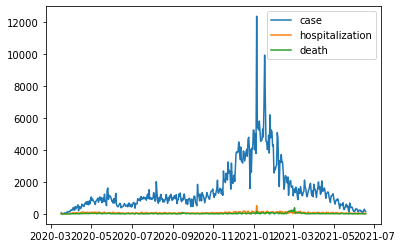

In [31]:
plt.plot(va_daily_count.report_date, va_daily_count.new_case, label='case')
plt.plot(va_daily_count.report_date, va_daily_count.new_hospitalization, label='hospitalization')
plt.plot(va_daily_count.report_date, va_daily_count.new_death, label='death')
plt.legend();

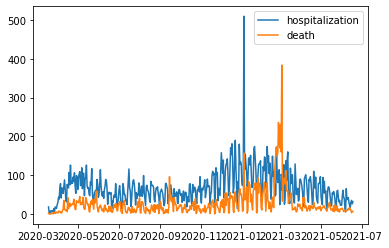

In [32]:
plt.plot(va_daily_count.report_date, va_daily_count.new_hospitalization, label='hospitalization')
plt.plot(va_daily_count.report_date, va_daily_count.new_death, label='death')
plt.legend();

## 2. COVID-19 Vaccines

In [33]:
df = pd.read_sql('SELECT * FROM vaccine_data;',engine)
df.head()

,administration_date,fips,locality,health_district,facility_type,vaccine_manufacturer,dose_number,vaccine_doses_administered
0,2021-06-17T00:00:00.000,51001,Accomack,Eastern Shore,Other Community Health Providers,Pfizer,2,4
1,2021-06-17T00:00:00.000,51001,Accomack,Eastern Shore,Medical Practices,Moderna,2,6
2,2021-06-17T00:00:00.000,51001,Accomack,Eastern Shore,Pharmacies,Moderna,1,3
3,2021-06-17T00:00:00.000,51001,Accomack,Eastern Shore,Other Community Health Providers,Pfizer,1,6
4,2021-06-17T00:00:00.000,51001,Accomack,Eastern Shore,Medical Practices,Moderna,1,2


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259100 entries, 0 to 259099
Data columns (total 8 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   administration_date         259098 non-null  object
 1   fips                        259100 non-null  object
 2   locality                    259100 non-null  object
 3   health_district             259100 non-null  object
 4   facility_type               259100 non-null  object
 5   vaccine_manufacturer        259100 non-null  object
 6   dose_number                 259100 non-null  object
 7   vaccine_doses_administered  259100 non-null  object
dtypes: object(8)
memory usage: 15.8+ MB


In [35]:
df['administration_date'] = pd.to_datetime(df.administration_date)
df['vaccine_doses_administered'] = df.vaccine_doses_administered.astype(int)

In [36]:
print(pd.unique(df.fips.values))

['51001' '51003' '51005' '51007' '51009' '51011' '51013' '51015' '51017'
 '51019' '51021' '51023' '51025' '51027' '51029' '51031' '51033' '51035'
 '51036' '51037' '51041' '51043' '51045' '51047' '51049' '51051' '51053'
 '51057' '51059' '51061' '51063' '51065' '51067' '51069' '51071' '51073'
 '51075' '51077' '51079' '51081' '51083' '51085' '51087' '51089' '51093'
 '51095' '51097' '51099' '51101' '51105' '51107' '51109' '51111' '51113'
 '51115' '51117' '51119' '51121' '51125' '51127' '51131' '51133' '51135'
 '51137' '51139' '51141' '51143' '51145' '51147' '51149' '51153' '51155'
 '51157' '51159' '51161' '51163' '51165' '51167' '51169' '51171' '51173'
 '51175' '51177' '51179' '51181' '51183' '51185' '51187' '51191' '51193'
 '51195' '51197' '51199' '51510' '51520' '51530' '51540' '51550' '51570'
 '51580' '51590' '51595' '51600' '51610' '51620' '51630' '51640' '51650'
 '51660' '51670' '51678' '51680' '51683' '51685' '51690' '51700' '51710'
 '51730' '51735' '51740' '51750' '51760' '51770' '5

In [37]:
print(pd.unique(df.health_district.values))

['Eastern Shore' 'Blue Ridge' 'Alleghany' 'Piedmont' 'Central Virginia'
 'Arlington' 'Central Shenandoah' 'Mount Rogers' 'Southside'
 'Cumberland Plateau' 'Rappahannock' 'Chickahominy' 'Chesterfield'
 'Lord Fairfax' 'Rappahannock Rapidan' 'Crater' 'Three Rivers' 'Fairfax'
 'New River' 'West Piedmont' 'Henrico' 'Western Tidewater' 'Peninsula'
 'Lenowisco' 'Loudoun' 'Pittsylvania-Danville' 'Prince William'
 'Alexandria' 'Chesapeake' 'Hampton' 'Norfolk' 'Portsmouth' 'Richmond'
 'Roanoke' 'Virginia Beach' 'Not Reported' 'Out of State']


In [38]:
print(pd.unique(df.facility_type.values))

['Other Community Health Providers' 'Medical Practices' 'Pharmacies'
 'Local Health Departments' 'Hospitals' 'Federal Doses']


In [39]:
print(pd.unique(df.dose_number.values))

['2' '1']


In [40]:
print(pd.unique(df.vaccine_manufacturer.values))

['Pfizer' 'Moderna' 'J&J' 'Non-Specified']


In [73]:
print("total_doses: ", df.vaccine_doses_administered.sum())
print("at least one dose: ", df[df.dose_number =='1'].vaccine_doses_administered.sum())
print("two doses: ", df[df.dose_number =='2'].vaccine_doses_administered.sum())
print("fully vaccinated: ", df[df.dose_number =='2'].vaccine_doses_administered.sum()+df[(df.dose_number =='1') & (df.vaccine_manufacturer =='J&J')].vaccine_doses_administered.sum())

total_doses:  8782457
at least one dose:  4910407
two doses:  3872050
fully vaccinated:  4167519


In [ ]:
#problems:
#1. Federal doses - district, manufacturer not specified
#2. Not reported, out of state

In [60]:
total_dose = df.groupby("administration_date")['vaccine_doses_administered'].sum().reset_index()
first_dose = df[df.dose_number =='1'].groupby("administration_date")['vaccine_doses_administered'].sum().reset_index()
two_dose = df[df.dose_number =='2'].groupby("administration_date")['vaccine_doses_administered'].sum().reset_index()

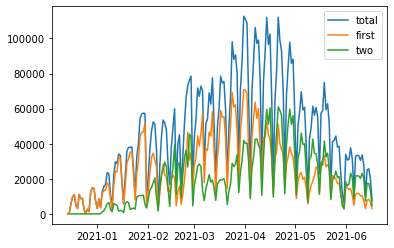

In [64]:
plt.plot(total_dose.administration_date, total_dose.vaccine_doses_administered, label='total')
plt.plot(first_dose.administration_date, first_dose.vaccine_doses_administered, label='first')
plt.plot(two_dose.administration_date, two_dose.vaccine_doses_administered, label='two')
plt.legend();

<AxesSubplot:xlabel='vaccine_manufacturer', ylabel='count'>

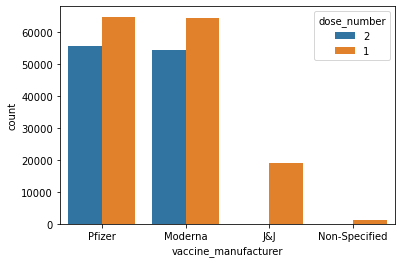

In [71]:
import seaborn as sns
sns.countplot(df.vaccine_manufacturer, hue=df.dose_number)

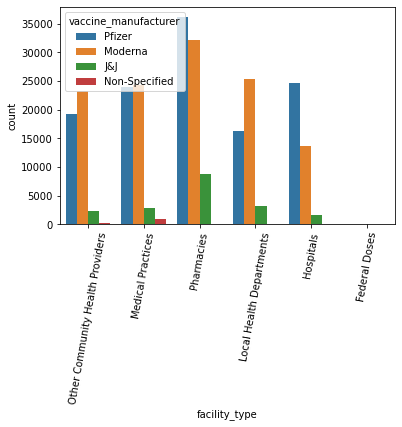

In [79]:
sns.countplot(df.facility_type, hue=df.vaccine_manufacturer)
plt.xticks(rotation=80);